In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

import os

In [158]:
# データの読み込み
ble_path_1 = "studydata1/ble"
wifi_path_1 = "studydata1/wifi"
# ファイル名の一覧を取得
ble_files_1 = os.listdir(ble_path_1)
wifi_files_1 = os.listdir(wifi_path_1)
# データを1つにまとめる
ble_wifi_df_1 = pd.DataFrame()
for file in ble_files_1:
    if file[-3:] == "csv":
        ble_wifi_df_1 = pd.concat([ble_wifi_df_1, pd.read_csv(ble_path_1 + "/" + file)], axis=0)
for file in wifi_files_1:
    if file[-3:] == "csv":
        ble_wifi_df_1 = pd.concat([ble_wifi_df_1, pd.read_csv(wifi_path_1 + "/" + file)], axis=0)

# インデックスをリセット
ble_wifi_df_1 = ble_wifi_df_1.reset_index(drop=True)
print(ble_wifi_df_1)

     rssi                               address
0     -80  98421ECE-25A4-08A3-E178-AA75CB3BC641
1     -99  E92E209F-9730-1FA4-906B-8ED4EC97D87E
2     -68  D7019209-3F13-A459-09DE-56A901DA7272
3     -93  BF6B68B0-9ACB-9B22-A5B3-01D0D7215FD5
4     -95  4FEC46E3-70DB-C064-C18B-BC831882AA6F
...   ...                                   ...
2803  -53                        aterm-ab3547-g
2804  -48                        aterm-a8d743-a
2805  -66                        aterm-b81467-a
2806  -57                        aterm-a8d743-a
2807  -51                        aterm-ab3547-a

[2808 rows x 2 columns]


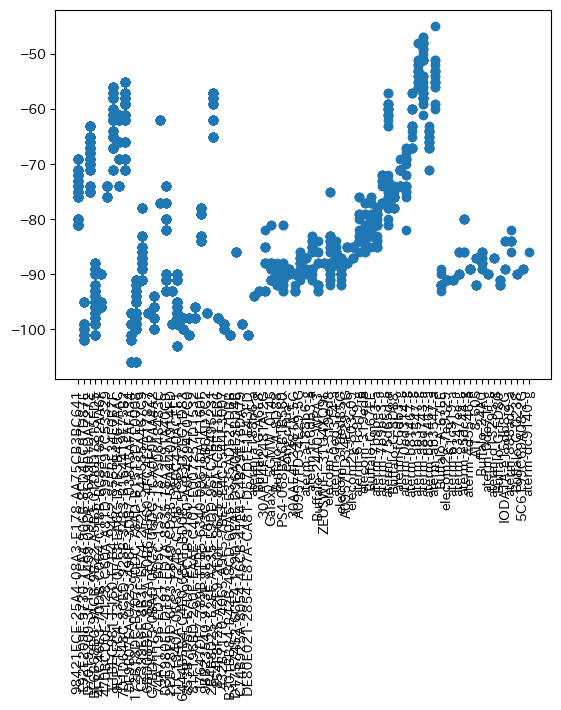

In [159]:
# ble_df_1をplot
plt.plot(ble_wifi_df_1["address"],ble_wifi_df_1["rssi"]*1,marker="o",linestyle="None")
plt.xticks(rotation=90)
plt.show()


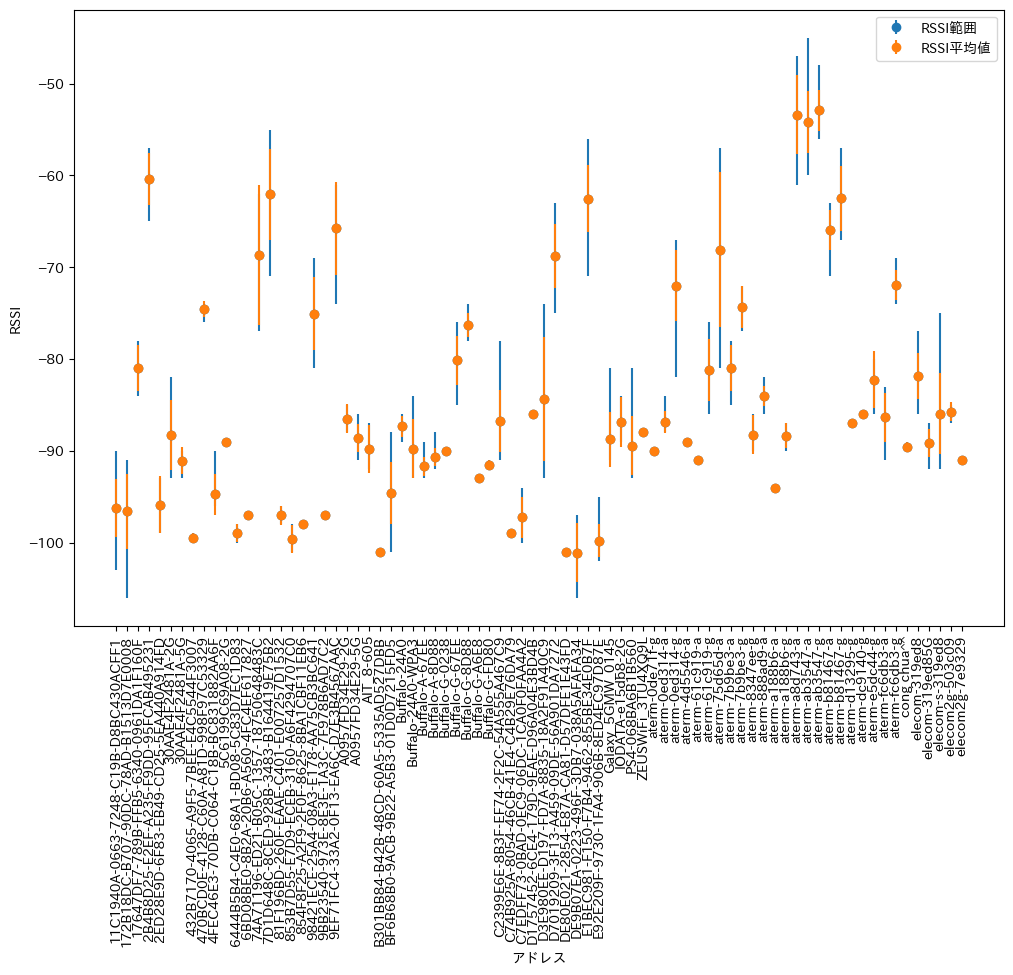

In [160]:
# ble_df_1 のデータを使ってグラフを作成
# 1. 'address'ごとのRSSIの平均値を計算
rssi_mean_1 = ble_wifi_df_1.groupby('address')['rssi'].mean()
# 2. 'address'ごとのRSSIの最小値を計算
rssi_min_1 = ble_wifi_df_1.groupby('address')['rssi'].min()
# 3. 'address'ごとのRSSIの最大値を計算
rssi_max_1 = ble_wifi_df_1.groupby('address')['rssi'].max()
# 4. 'address'ごとのRSSIの標準偏差を計算
rssi_std_1 = ble_wifi_df_1.groupby('address')['rssi'].std()

# 1つのグラフにまとめて表示
plt.figure(figsize=(12, 8))
plt.errorbar(rssi_mean_1.index, rssi_mean_1, yerr=[rssi_mean_1-rssi_min_1, rssi_max_1-rssi_mean_1], fmt='o', label='RSSI範囲')
plt.errorbar(rssi_mean_1.index, rssi_mean_1, yerr=rssi_std_1, fmt='o', label='RSSI平均値')
plt.xticks(rotation=90)
plt.xlabel('アドレス')
plt.ylabel('RSSI')
plt.legend()
plt.show()

In [161]:
# データの読み込み
ble_path_2 = "studydata2/ble"
wifi_path_2 = "studydata2/wifi"
# ファイル名の一覧を取得
ble_files_2 = os.listdir(ble_path_2)
wifi_files_2 = os.listdir(wifi_path_2)
# データを1つにまとめる
ble_wifi_df_2 = pd.DataFrame()
for file in ble_files_2:
    if file[-3:] == "csv":
        ble_wifi_df_2 = pd.concat([ble_wifi_df_2, pd.read_csv(ble_path_2 + "/" + file)], axis=0)
for file in wifi_files_2:
    if file[-3:] == "csv":
        ble_wifi_df_2 = pd.concat([ble_wifi_df_2, pd.read_csv(wifi_path_2 + "/" + file)], axis=0)
# インデックスをリセット
ble_wifi_df_2 = ble_wifi_df_2.reset_index(drop=True)

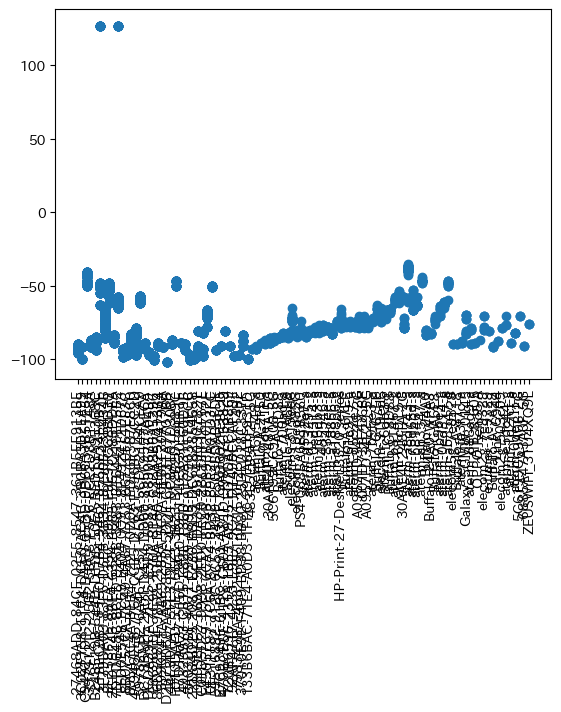

In [162]:
# ble_df_2をplot
plt.plot(ble_wifi_df_2["address"],ble_wifi_df_2["rssi"]*1,marker="o",linestyle="None")
plt.xticks(rotation=90)
plt.show()

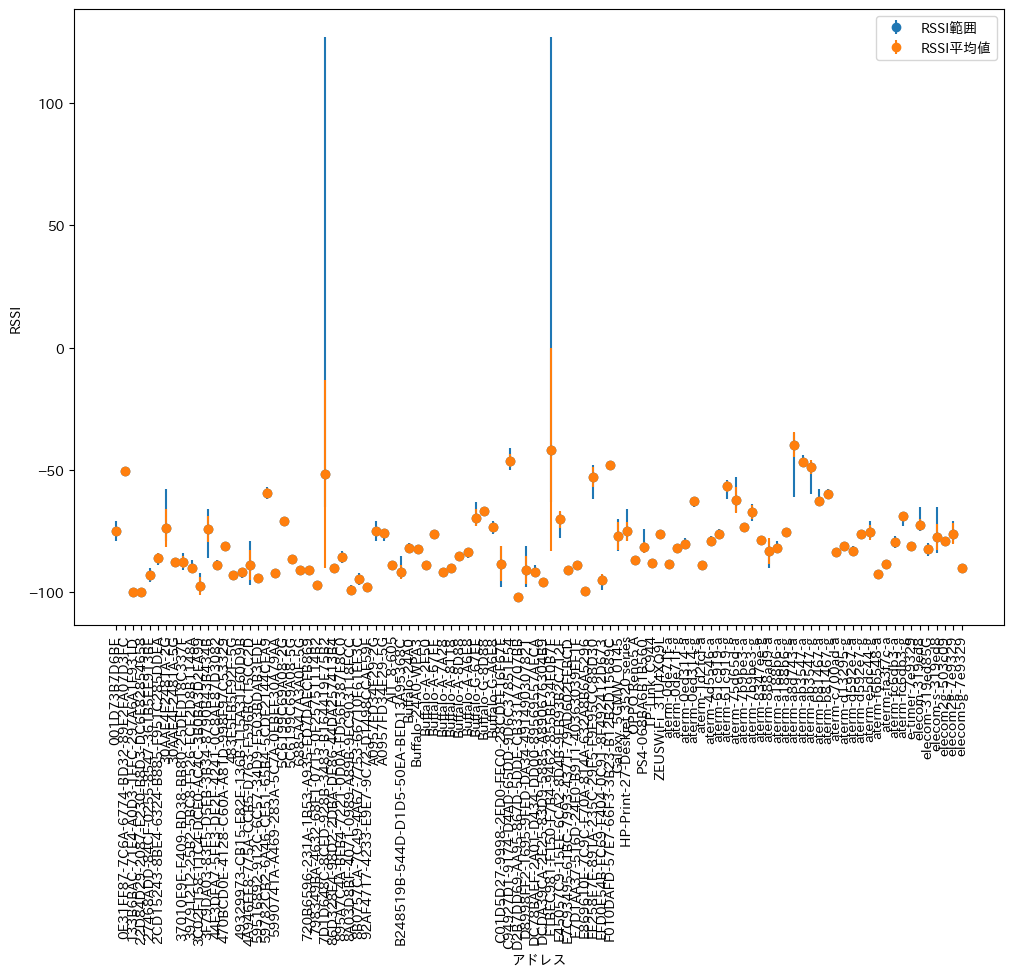

In [163]:
# ble_df_2 のデータを使ってグラフを作成
# 1. 'address'ごとのRSSIの平均値を計算
rssi_mean_2 = ble_wifi_df_2.groupby('address')['rssi'].mean()
# 2. 'address'ごとのRSSIの最小値を計算
rssi_min_2 = ble_wifi_df_2.groupby('address')['rssi'].min()
# 3. 'address'ごとのRSSIの最大値を計算
rssi_max_2 = ble_wifi_df_2.groupby('address')['rssi'].max()
# 4. 'address'ごとのRSSIの標準偏差を計算
rssi_std_2 = ble_wifi_df_2.groupby('address')['rssi'].std()

# 1つのグラフにまとめて表示
plt.figure(figsize=(12, 8))
plt.errorbar(rssi_mean_2.index, rssi_mean_2, yerr=[rssi_mean_2-rssi_min_2, rssi_max_2-rssi_mean_2], fmt='o', label='RSSI範囲')
plt.errorbar(rssi_mean_2.index, rssi_mean_2, yerr=rssi_std_2, fmt='o', label='RSSI平均値')
plt.xticks(rotation=90)
plt.xlabel('アドレス')
plt.ylabel('RSSI')
plt.legend()
plt.show()

In [164]:
# ガウス分布の確率密度関数を求める関数
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

In [165]:
def test_data(file_num):
    # test ようのデータ
    test_ble_path = "test2/ble"
    test_wifi_path = "test2/wifi"
    # ファイル名の一覧を取得
    test_ble_files = os.listdir(test_ble_path)
    test_wifi_files = os.listdir(test_wifi_path)
    # 1つめのデータを読み込む
    test_ble_wifi_df = pd.DataFrame()
    file = test_ble_files[file_num]
    if file[-3:] == "csv":
        test_ble_wifi_df = pd.concat([test_ble_wifi_df, pd.read_csv(test_ble_path + "/" + file)], axis=0)
    file = test_wifi_files[file_num]
    if file[-3:] == "csv":
        test_ble_wifi_df = pd.concat([test_ble_wifi_df, pd.read_csv(test_wifi_path + "/" + file)], axis=0)

    # インデックスをリセット
    test_ble_wifi_df = test_ble_wifi_df.reset_index(drop=True)

    test_rssi_mean = test_ble_wifi_df.groupby('address')['rssi'].mean()
    test_rssi_std = test_ble_wifi_df.groupby('address')['rssi'].std()

    return test_rssi_mean, test_rssi_std

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/2446402953.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] = gaussian(x, rssi_mean_1[i], rssi_std_1[i])
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: divide by zero encountered in divide
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: invalid value encountered in multiply
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


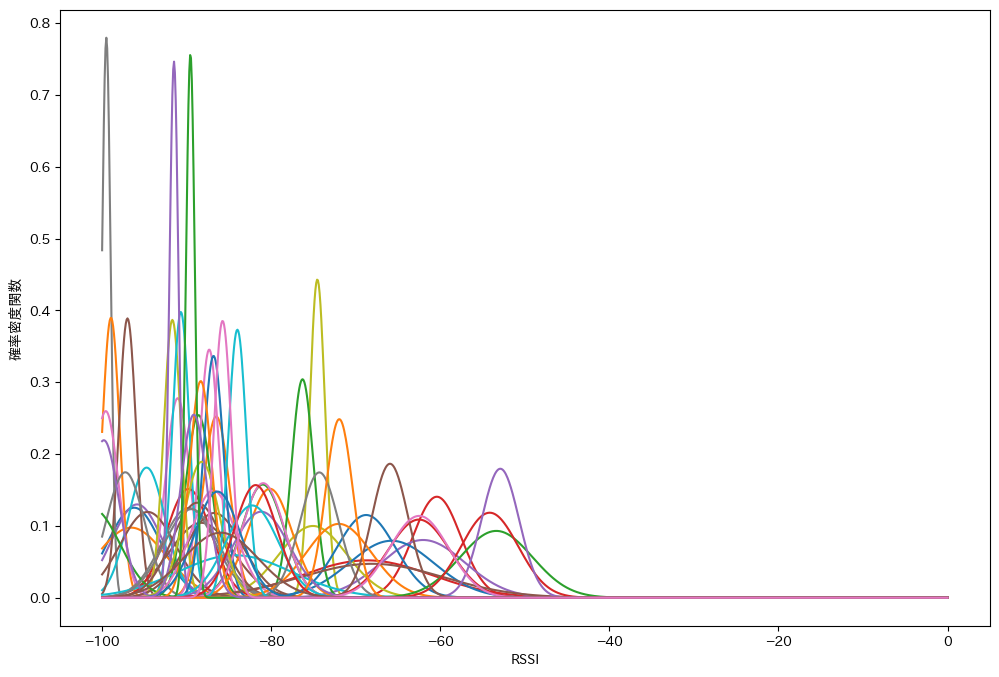

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/2446402953.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] = gaussian(x, rssi_mean_2[i], rssi_std_2[i])
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: divide by zero encountered in divide
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: invalid value encountered in divide
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
/var/folders/qx/g7

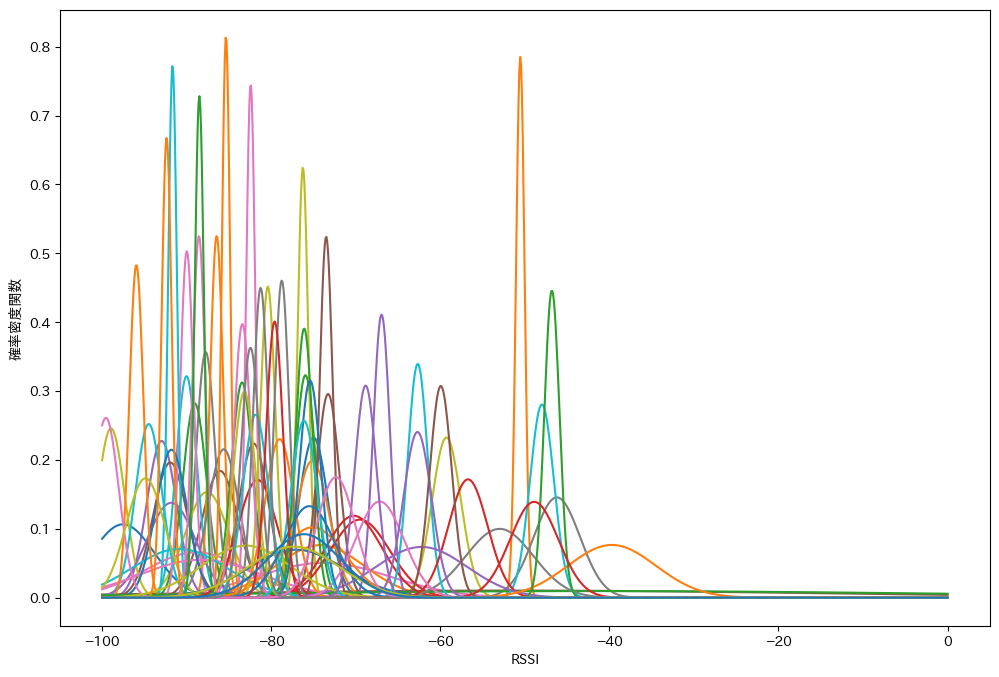

In [166]:
# ble_wifi_1 でインスタンスを作成
rssi_mean_1 = ble_wifi_df_1.groupby('address')['rssi'].mean()
rssi_std_1 = ble_wifi_df_1.groupby('address')['rssi'].std()
# 次元数を拡張したガウス分布の確率密度関数を求める
x = np.linspace(-100, 0, 1000)
y = np.zeros((len(rssi_mean_1), 1000))
for i in range(len(rssi_mean_1)):
    y[i] = gaussian(x, rssi_mean_1[i], rssi_std_1[i])

# 1つのグラフにまとめて表示
plt.figure(figsize=(12, 8))
for i in range(len(rssi_mean_1)):
    plt.plot(x, y[i], label=rssi_mean_1.index[i])
plt.xlabel('RSSI')
plt.ylabel('確率密度関数')
plt.show()

# ble_wifi_2 でインスタンスを作成
rssi_mean_2 = ble_wifi_df_2.groupby('address')['rssi'].mean()
rssi_std_2 = ble_wifi_df_2.groupby('address')['rssi'].std()
# 次元数を拡張したガウス分布の確率密度関数を求める
x = np.linspace(-100, 0, 1000)
y = np.zeros((len(rssi_mean_2), 1000))
for i in range(len(rssi_mean_2)):
    y[i] = gaussian(x, rssi_mean_2[i], rssi_std_2[i])

# 1つのグラフにまとめて表示
plt.figure(figsize=(12, 8))
for i in range(len(rssi_mean_2)):
    plt.plot(x, y[i], label=rssi_mean_2.index[i])
plt.xlabel('RSSI')
plt.ylabel('確率密度関数')
plt.show()

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/1262264886.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gauss_1 = gaussian(test_rssi_mean[j], rssi_mean_1[j], rssi_std_1[j])
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/1262264886.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gauss_2 = gaussian(test_rssi_mean[j], rssi_mean_2[j], rssi_std_2[j])
/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_68935/3272378582.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
/var/folders/qx/g7

log_p_1: -2110.261431764577 log_p_2: -1337.480273222022
log_p_1: -1956.6446948028156 log_p_2: -2048.187092495727
log_p_1: -2798.315388562246 log_p_2: -1355.9042140077668
log_p_1: -3261.346484750227 log_p_2: -3081.2064073814263
log_p_1: -2139.535042284947 log_p_2: -2793.205324425706
log_p_1: -2544.0926317908525 log_p_2: -2219.7359452480973
log_p_1: -1835.4660557396992 log_p_2: -1657.6985698283638
log_p_1: -2202.8014066618675 log_p_2: -2116.7649125453104
log_p_1: -2566.1253782629356 log_p_2: -2440.8081301041843
log_p_1: -3421.8798824074647 log_p_2: -2458.0684968453534
log_p_1: -2145.4326184983506 log_p_2: -1735.7902720752695
log_p_1: -1545.0029661694523 log_p_2: -2735.373357061498
log_p_1: -2910.4409407455414 log_p_2: -2568.2266030660567
log_p_1: -2888.3955054615053 log_p_2: -2234.412738856672
log_p_1: -2308.3639552021073 log_p_2: -2573.075371488701
log_p_1: -1537.8233605925413 log_p_2: -1797.0665585503568
log_p_1: -1898.306709832628 log_p_2: -1376.9955822139498
log_p_1: -1177.7879316516

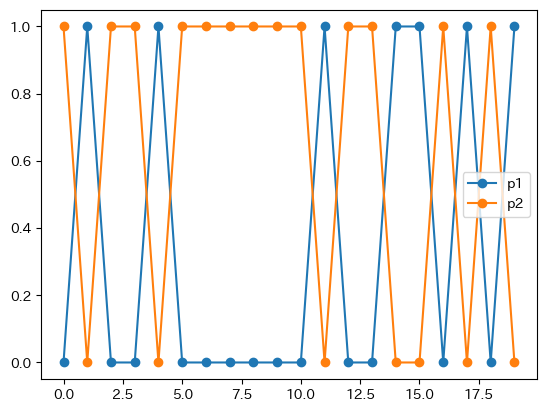

In [183]:
p1s = []
p2s = []
for i in range(20):
    test_rssi_mean, test_rssi_std = test_data(i)

    # test のデータが 1 と 2 のどちらに属するかを判定
    log_p_1 = 0
    log_p_2 = 0
    for j in range(len(test_rssi_mean)):
        gauss_1 = gaussian(test_rssi_mean[j], rssi_mean_1[j], rssi_std_1[j])
        gauss_2 = gaussian(test_rssi_mean[j], rssi_mean_2[j], rssi_std_2[j])
        if gauss_1 > 0:
            log_p_1 += np.log(gauss_1)
        if gauss_2 > 0:
            log_p_2 += np.log(gauss_2)

    print("log_p_1:", log_p_1,"log_p_2:", log_p_2)
    if log_p_1 > log_p_2:
        p1s.append(1)
        p2s.append(0)
    else:
        p1s.append(0)
        p2s.append(1)

#plot 
plt.plot(p1s,marker="o",label="p1")
plt.plot(p2s,marker="o",label="p2")
plt.legend()
plt.show()